In [94]:
# Some useful imports
import numpy as np
import matplotlib.pyplot as plt

In [102]:
rng = np.random.default_rng()

N = 1000
Z = 100
T = 10000
m = 200
X = np.zeros((N, T), dtype=int)
good_decision = 1
bad_decision = 1-good_decision
p = 0.7
X[:, 0] = rng.integers(0, 2, size=N)

for t in range(1,T):
    i = rng.integers(0, N)
    if i<Z:
        s = rng.binomial(1, p)
        if s==1:
            X[i,t] = good_decision
        else:
            X[i,t] = bad_decision
    else:
        indices = rng.choice(N, size=m, replace=False)
        count = 0
        for idx in indices:
            if X[idx,t-1] == good_decision:
                count+=1
        if count >= (m+1)//2:
            X[i,t] = good_decision
        else:
            X[i,t] = bad_decision
    for j in range(0, N):
        if j!=i:
            X[j,t] = X[j,t-1]

N1_fund = X[:Z, -1].sum()
N0_fund = Z-N1_fund
N1_fol = X[Z:, -1].sum()
N0_fol = N-Z-N1_fol

print("=== Résultats à la date finale ===\n")

print("Fondamentaux (Z premiers agents)")
print(f"  Nombre de 1 : {N1_fund}")
print(f"  Nombre de 0 : {N0_fund}")
print(f"  Proportion de 1 : {N1_fund/Z:.2f}\n")

print("Followers (autres agents)")
print(f"  Nombre de 1 : {N1_fol}")
print(f"  Nombre de 0 : {N0_fol}")
print(f"  Proportion de 1 : {N1_fol/(N-Z):.2f}\n")

print("Fondamentalistes et Followers")
print(f"  Proportion totale de 1 : {(N1_fol+N1_fund)/N:.2f}")


=== Résultats à la date finale ===

Fondamentaux (Z premiers agents)
  Nombre de 1 : 62
  Nombre de 0 : 38
  Proportion de 1 : 0.62

Followers (autres agents)
  Nombre de 1 : 900
  Nombre de 0 : 0
  Proportion de 1 : 1.00

Fondamentalistes et Followers
  Proportion totale de 1 : 0.96


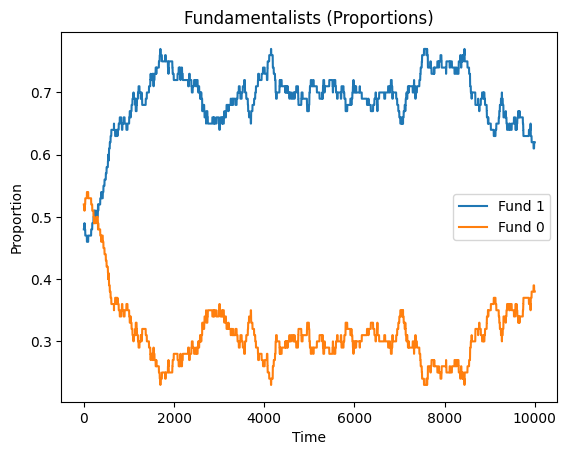

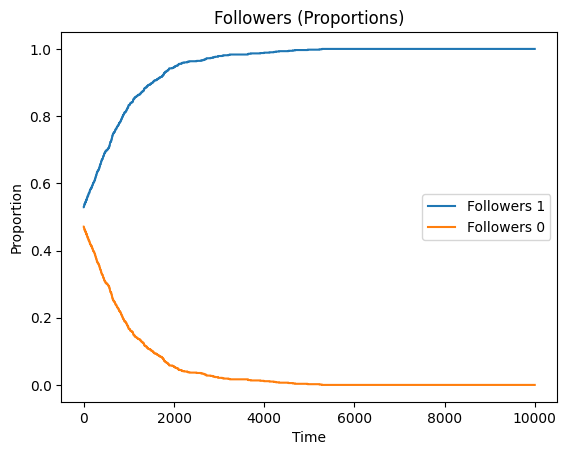

In [103]:
# Séries temporelles (proportions)
prop1_fund_t = X[:Z, :].sum(axis=0) / Z
prop0_fund_t = 1 - prop1_fund_t

prop1_fol_t = X[Z:, :].sum(axis=0) / (N - Z)
prop0_fol_t = 1 - prop1_fol_t

time = np.arange(T)

# Plot fondamentalistes
plt.figure()
plt.plot(time, prop1_fund_t, label="Fund 1")
plt.plot(time, prop0_fund_t, label="Fund 0")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.title("Fundamentalists (Proportions)")
plt.legend()
plt.show()

# Plot followers
plt.figure()
plt.plot(time, prop1_fol_t, label="Followers 1")
plt.plot(time, prop0_fol_t, label="Followers 0")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.title("Followers (Proportions)")
plt.legend()
plt.show()
